In [1]:
import pandas as pd

In [2]:
file_path = r"C:\Users\callum\OneDrive\MSc datascience\DSM 500 final project\Fine grained entity tagging with large language models\data\few_nerd\train.txt"

In [3]:
with open(file_path, 'r',encoding='utf-8') as file:
    lines = file.readlines()

sentences = []
current_sentence = []

for line in lines:
    line = line.strip()
    if line == '':
        if current_sentence:
            sentences.append(current_sentence)
            current_sentence = []
    else:
        word, label = line.split('\t')
        current_sentence.append((word, label))

In [4]:
labels = [word_label[1] for sentence in sentences for word_label in sentence]

In [5]:
label_df = pd.DataFrame(labels,columns=["label"])

In [6]:
labels_only = label_df[label_df["label"]!="O"]

In [7]:
labels_only["indicator"] = 1

C:\Users\callum\AppData\Local\Temp\ipykernel_3404\2521983306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_only["indicator"] = 1


In [8]:
labels_only_distribution = labels_only.groupby("label").agg({"indicator":"sum"})

In [9]:
labels_only_distribution = labels_only_distribution.reset_index()
labels_only_distribution = labels_only_distribution.sort_values("indicator",ascending=False)
labels_only_distribution.rename(columns={"indicator":"count"},inplace=True)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#make a publication style plot of the labels_only_distribution dataframe

# sns.set_style("whitegrid")
sns.set_context("paper")


In [12]:
#create a cumulative sum column
labels_only_distribution["cumsum"] = labels_only_distribution["count"].cumsum()
#convert cumsum column to percentage of total size
labels_only_distribution["cumsum"] = labels_only_distribution["cumsum"]/labels_only_distribution["count"].sum()

In [14]:
import pandas as pd

# Determine the desired ratio between the larger and smaller classes
desired_ratio = 10 # Adjust this as needed

# Identify the class labels and their respective counts
label_counts = labels_only['label'].value_counts()

# Calculate the desired number of samples for each class
desired_samples = {label: int(min(count, label_counts.min() * desired_ratio)) for label, count in label_counts.items()}

# Proportional undersampling
undersampled_df = pd.DataFrame()
for label, count in label_counts.items():
    undersampled_samples = labels_only[labels_only['label'] == label].sample(desired_samples[label], replace=False, random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_samples])

# Calculate the size of the undersampled dataset
undersampled_size = len(undersampled_df)

print(f"Undersampled dataset size: {undersampled_size}")


Undersampled dataset size: 381501


In [1]:
381501/491711

0.7758642780006956

In [15]:
undersampled_df.groupby("label").agg({"indicator":"sum"}).reset_index().sort_values("indicator",ascending=False)

,label,indicator
36,organization-sportsteam,8450
27,organization-company,8450
39,other-biologything,8450
24,location-other,8450
28,organization-education,8450
...,...,...
16,event-election,2006
15,event-disaster,1832
11,building-restaurant,1824
18,event-protest,1341


In [16]:
undersamples_labels_only_distribution = undersampled_df.groupby("label").agg({"indicator":"sum"})

In [17]:
undersamples_labels_only_distribution = undersamples_labels_only_distribution.reset_index()
undersamples_labels_only_distribution = undersamples_labels_only_distribution.sort_values("indicator",ascending=False)
undersamples_labels_only_distribution.rename(columns={"indicator":"count"},inplace=True)

In [18]:
#create a cumulative sum column
undersamples_labels_only_distribution["cumsum"] = undersamples_labels_only_distribution["count"].cumsum()
#convert cumsum column to percentage of total size
undersamples_labels_only_distribution["cumsum"] = undersamples_labels_only_distribution["cumsum"]/undersamples_labels_only_distribution["count"].sum()

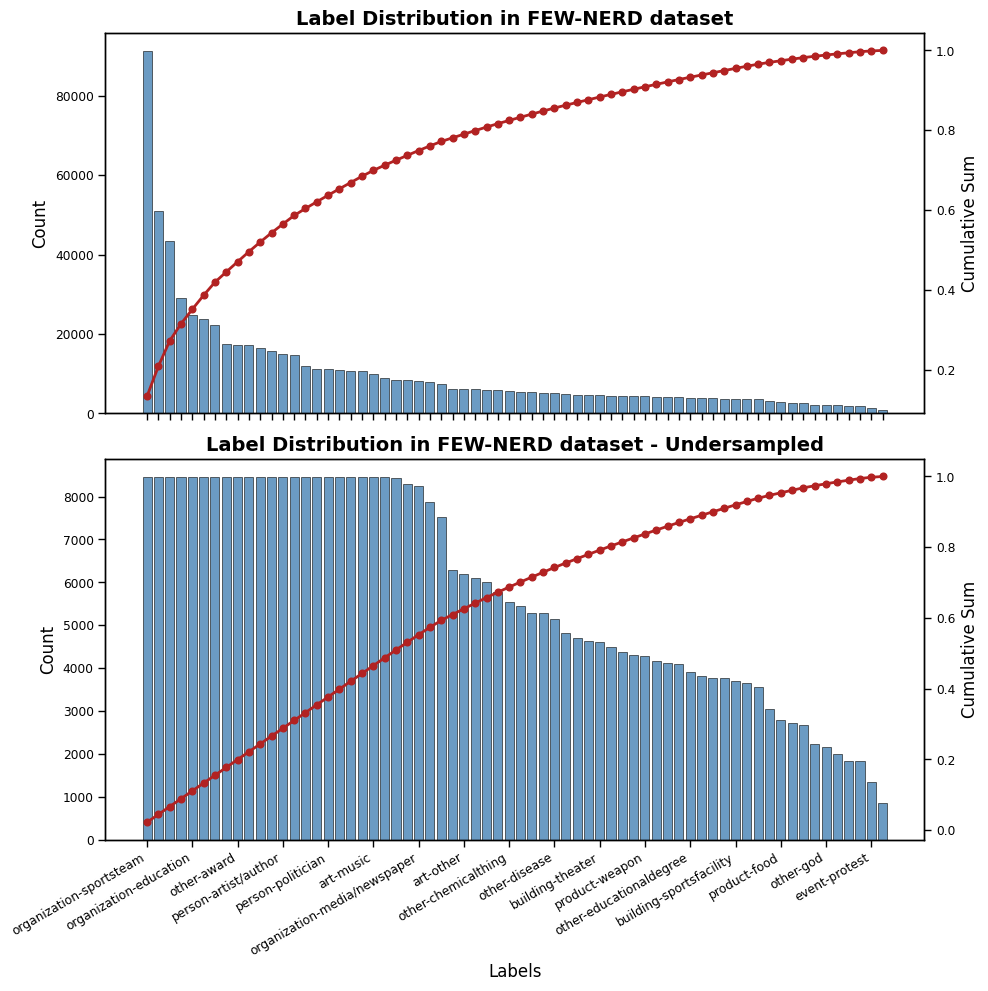

In [21]:
import matplotlib.pyplot as plt

# Create a figure and two subplots with a shared X-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=False)

# Plot the original label distribution
ax1.bar(labels_only_distribution["label"], labels_only_distribution["count"], color='steelblue', alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_ylabel('Count', fontsize=12)
#remove x labels on ax1
ax1.set_xticklabels([])
ax1.set_title('Label Distribution in FEW-NERD dataset', fontsize=14, fontweight='bold')

# Add cumulative sum as a line plot on a secondary y-axis for the original distribution
ax1_2 = ax1.twinx()
ax1_2.plot(labels_only_distribution["label"], labels_only_distribution["cumsum"], color='firebrick', marker='o', linewidth=2)
ax1_2.set_ylabel('Cumulative Sum', fontsize=12)

# Plot the undersampled label distribution
ax2.bar(undersamples_labels_only_distribution["label"], undersamples_labels_only_distribution["count"], color='steelblue', alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Labels', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Label Distribution in FEW-NERD dataset - Undersampled', fontsize=14, fontweight='bold')

# Add cumulative sum as a line plot on a secondary y-axis for the undersampled distribution
ax2_2 = ax2.twinx()
ax2_2.plot(undersamples_labels_only_distribution["label"], undersamples_labels_only_distribution["cumsum"], color='firebrick', marker='o', linewidth=2)
ax2_2.set_ylabel('Cumulative Sum', fontsize=12)

# Set tick parameters
ax2.set_xticks(undersamples_labels_only_distribution["label"][::4])
#rotate x labels on ax2
ax2.set_xticklabels(undersamples_labels_only_distribution["label"][::4], rotation=30, ha='right')

# Adjust spacing and layout
plt.tight_layout()

# Put a black border around the plots
for spine in ax1.spines.values():
    spine.set_edgecolor('black')
for spine in ax2.spines.values():
    spine.set_edgecolor('black')

# Save the plot as a high-resolution image (e.g., PNG or PDF) for publication
plt.savefig('label_distribution.png', dpi=300)

# Display the plot
plt.show()
